In [2]:
from google.colab import drive
drive.mount('/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /gdrive


In [0]:
import cv2
from google.colab.patches import cv2_imshow  

Ex 4:Write a script which reads 'coin.jpg' as input and outputs a new image containing:

only the coins touching the boundary of the image
only the coins which overlap with each other. 
only non-overlapping coins.



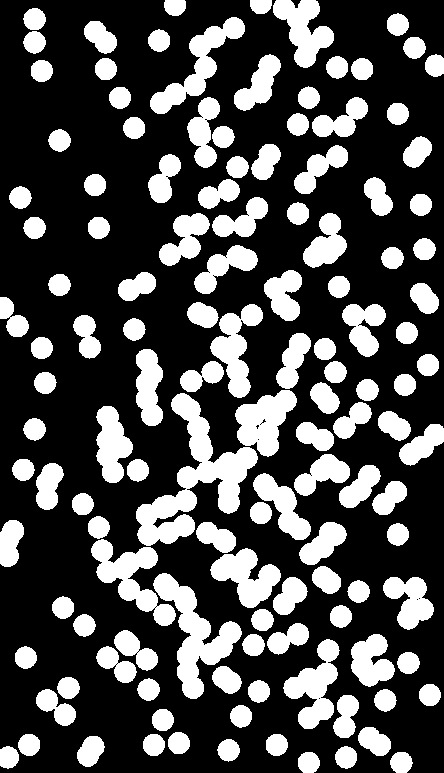

In [15]:
path = '/gdrive/My Drive/Image Processing/'
I = cv2.imread(path+'coins.jpg',cv2.IMREAD_GRAYSCALE)  
cv2_imshow(I)

# Coins at boundary

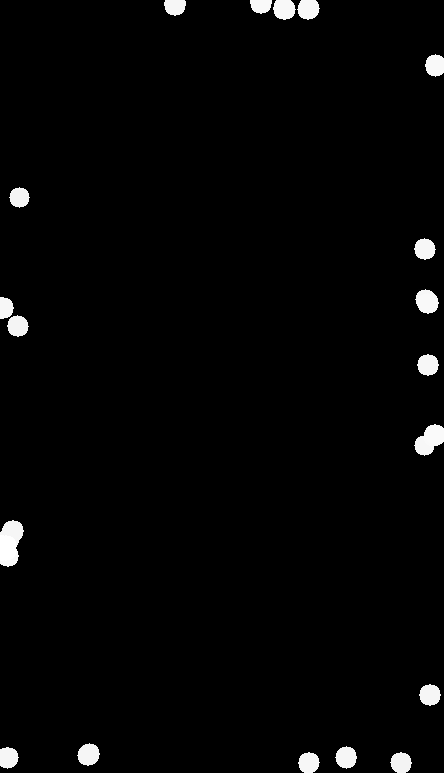

In [8]:
from skimage import morphology as morp
import numpy as np
dis = morp.disk(10)   #since diameter of disk is 10
I1 = cv2.erode(I,dis)
I1[10:I1.shape[0] - 20, 20:I1.shape[1] - 20] = 0
I2 = cv2.dilate(I1,dis)
cv2_imshow(np.hstack([I2]))

In [9]:
print(dis)

[[0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0]
 [0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0]
 [0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0]
 [0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0]
 [0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0]
 [0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0]
 [0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0]
 [0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0]
 [0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0]
 [0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0]
 [0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0]
 [0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0]
 [0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0]
 [0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0]
 [0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0]
 [0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0]
 [0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0]]


# Coins which are Overlapping

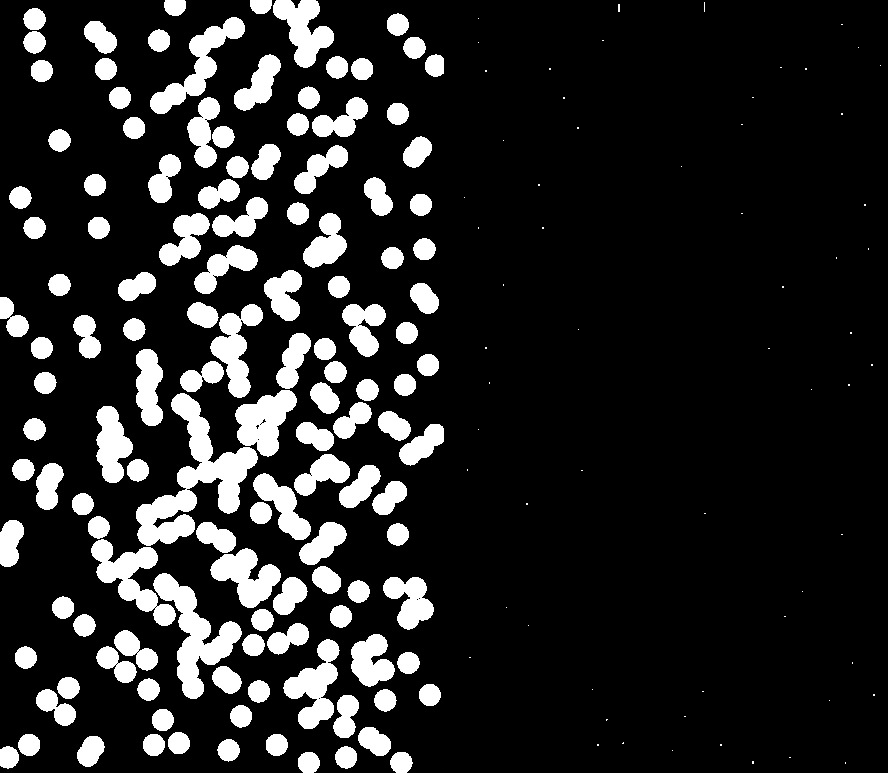

(773, 444)
Number of coins which are overlapping = 54 



In [70]:
se=np.zeros((25,25))
se[0,:]=-1
se[se.shape[0]-1,:]=-1
se[:,0]=-1
se[:,se.shape[1]-1]=-1
se[int(se.shape[0]/2)][int(se.shape[0]/2)]=1
I1 = cv2.morphologyEx(I,cv2.MORPH_HITMISS,se)
I2 = cv2.dilate(I1,morp.disk(15))
ret,thresh1 = cv2.threshold(I2,120,255,cv2.THRESH_BINARY)
thresh1 = cv2.dilate(thresh1,morp.disk(1))
cv2_imshow(np.hstack([I,I1]))
arr=np.zeros((thresh1.shape[0],thresh1.shape[1]))
count=0
print(thresh1.shape)
for i in range(len(thresh1)):
  for j in range(len(thresh1[i])):
    if thresh1[i][j]==255:
      if(arr[i][j]==0):
        count+=1
        for k in range(max(0,i-11),min(len(thresh1),i+100)):
          for l in range(max(0,j-11),min(len(thresh1[i]),j+100)):
            arr[k][l]=1
print("Number of coins which are overlapping =",count,"\n")

# Coins which are non-overlapping

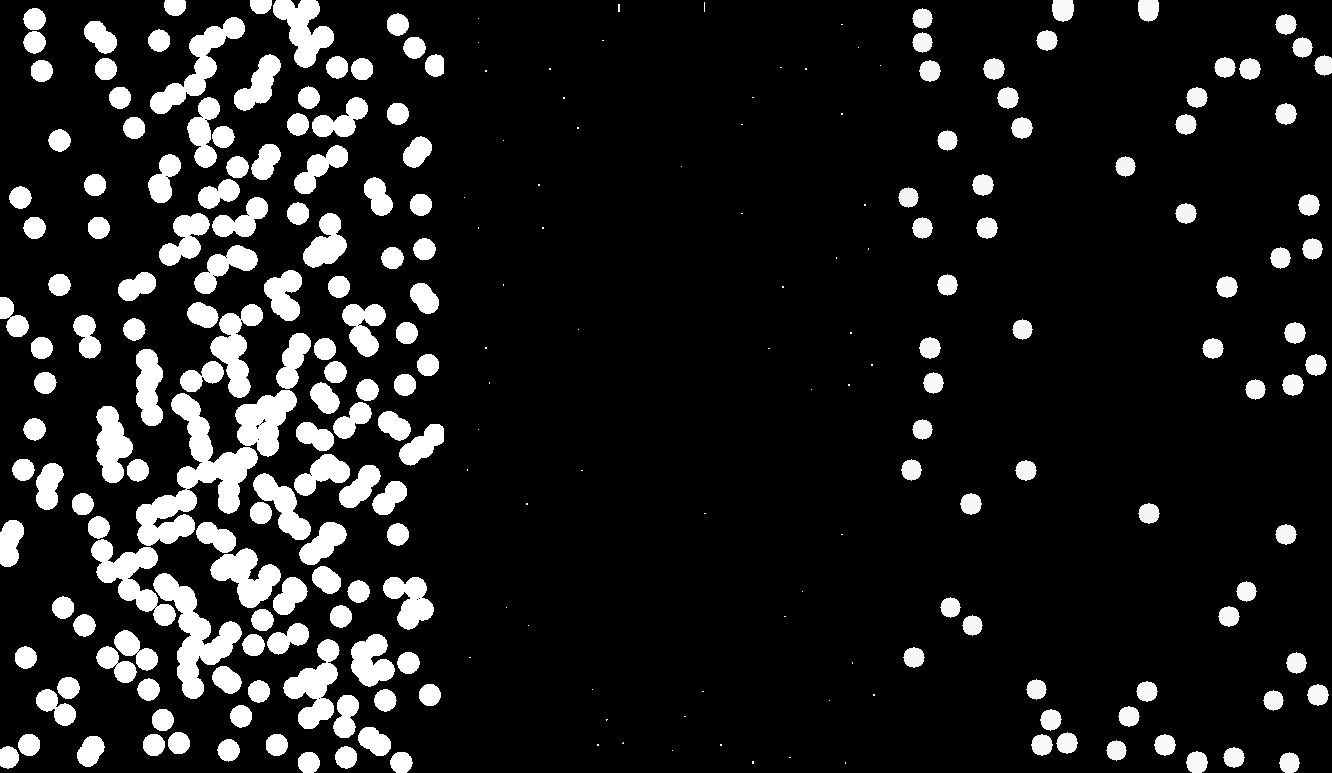

(773, 444)
Number of coins which are non-overlapping = 34 



In [69]:
se=np.zeros((25,25))
se[0,:]=-1
se[se.shape[0]-1,:]=-1
se[:,0]=-1
se[:,se.shape[1]-1]=-1
se[int(se.shape[0]/2)][int(se.shape[0]/2)]=1
I1 = cv2.morphologyEx(I,cv2.MORPH_HITMISS,se)
I2 = cv2.dilate(I1,morp.disk(10))
ret,thresh1 = cv2.threshold(I2,120,255,cv2.THRESH_BINARY)
thresh1 = cv2.dilate(thresh1,morp.disk(1))
cv2_imshow(np.hstack([I,I1,I2]))
arr=np.zeros((thresh1.shape[0],thresh1.shape[1]))
count=0
print(thresh1.shape)
for i in range(len(thresh1)):
  for j in range(len(thresh1[i])):
    if thresh1[i][j]==255:
      if(arr[i][j]==0):
        count+=1
        for k in range(max(0,i-11),min(len(thresh1),i+100)):
          for l in range(max(0,j-11),min(len(thresh1[i]),j+100)):
            arr[k][l]=1
print("Number of coins which are non-overlapping =",count,"\n")

HW: Read the image 'objects.png' and try to answer the following questions using code.
Identify means plot the following objects.

How many objects have one or more holes?
How many square objects are in the image?
Identify the square objects that have holes.
Identify the circular objects that have no holes



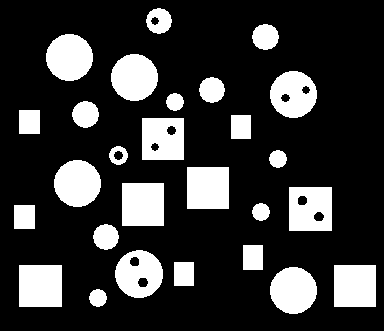

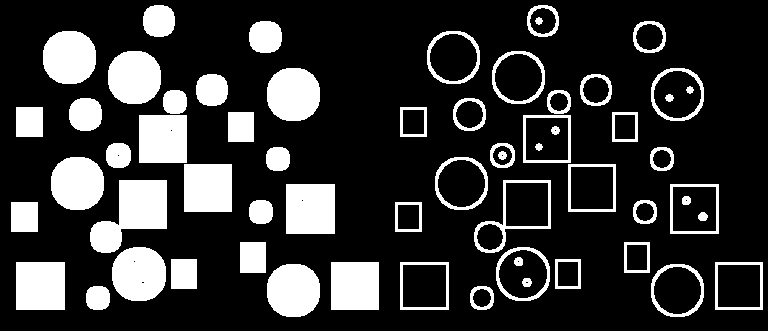

In [67]:
path = '/gdrive/My Drive/Image Processing/'
I2 = cv2.imread(path+'objects.png',cv2.IMREAD_UNCHANGED)  
cv2_imshow(I2)
sq = morp.square(3)
dil1 =cv2.dilate(I2,sq,iterations=3)
I3 =dil1-I2
cv2_imshow(np.hstack([dil1,I3]))

HW: Write a script which takes the image 'text2.png' as input and outputs the number of components for each of the five colors. Note that the components may be non-letters (e.g. . and |) Use thresholding and connected components to solve this. You can crop image for each colour manually.


In [56]:
import matplotlib.pyplot as plt
# using cropped image for each color
red = cv2.imread('red.png', cv2.IMREAD_GRAYSCALE)
blue= cv2.imread('blue_text.png', cv2.IMREAD_GRAYSCALE)
green = cv2.imread('green_text.png', cv2.IMREAD_GRAYSCALE)
black = cv2.imread('black_text.png', cv2.IMREAD_GRAYSCALE)
purple = cv2.imread('purple_text.png', cv2.IMREAD_GRAYSCALE)

ret,thresh1 = cv2.threshold(red,127,255,cv2.THRESH_BINARY_INV)
ret,thresh2 = cv2.threshold(blue,127,255,cv2.THRESH_BINARY_INV)
ret,thresh3 = cv2.threshold(green,127,255,cv2.THRESH_BINARY_INV)
ret,thresh4 = cv2.threshold(black,127,255,cv2.THRESH_BINARY_INV)
ret,thresh5 = cv2.threshold(purple,127,255,cv2.THRESH_BINARY_INV)
num_labels1, labels_im1 = cv2.connectedComponents(thresh1)
num_labels2, labels_im2 = cv2.connectedComponents(thresh2)
num_labels3, labels_im3 = cv2.connectedComponents(thresh3)
num_labels4, labels_im4 = cv2.connectedComponents(thresh4)
num_labels5, labels_im5 = cv2.connectedComponents(thresh5)

print(num_labels1)
# print(num_labels2)
# print(num_labels3)
# print(num_labels4)
# print(num_labels5)


25


# Chroma Keying

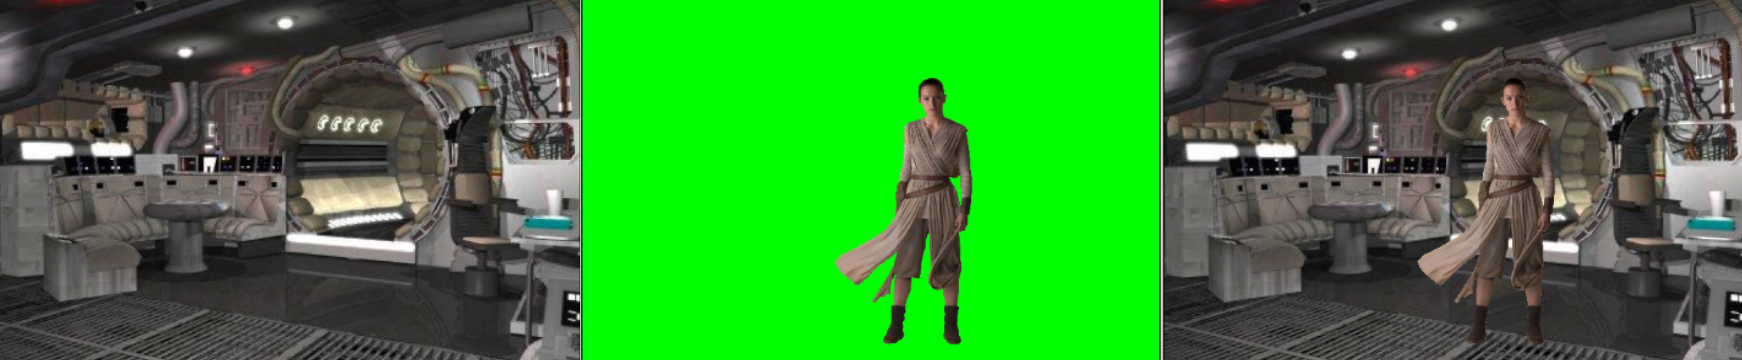

In [87]:
path2 = '/gdrive/My Drive/images/'
I = cv2.imread(path+'chroma_keying_demo.png',cv2.IMREAD_UNCHANGED)  
cv2_imshow(I)

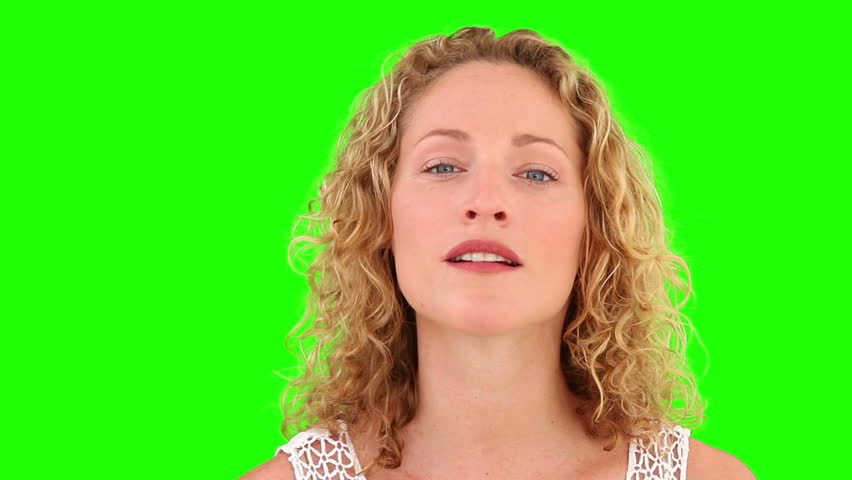

In [141]:
path2 = '/gdrive/My Drive/images/'
I = cv2.imread(path+'chroma_img.jpg',cv2.IMREAD_UNCHANGED)  
cv2_imshow(I)


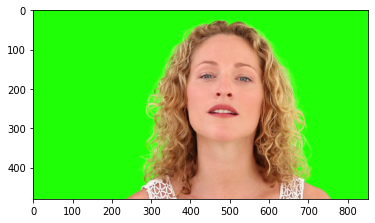

In [91]:
import matplotlib.pyplot as plt
image_copy = np.copy(I)
image_copy = cv2.cvtColor(image_copy, cv2.COLOR_BGR2RGB)
plt.imshow(image_copy)

In [0]:
lower_green = np.array([0, 100, 0])    
upper_green = np.array([120, 255, 100])

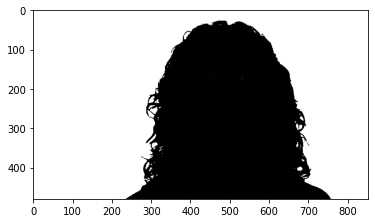

In [94]:
# Define the masked area
mask = cv2.inRange(image_copy, lower_green, upper_green)
# Vizualize the mask
plt.imshow(mask,'gray')

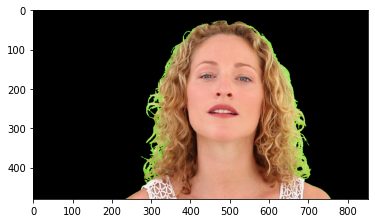

In [95]:
masked_image = np.copy(image_copy)
masked_image[mask != 0] = [0, 0, 0
plt.imshow(masked_image)

(598, 800, 3)
(480, 852, 3)


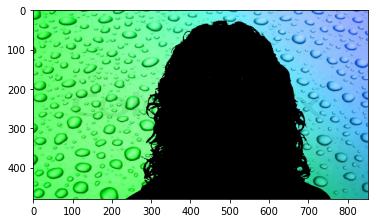

In [136]:
# Load in a background image, and convert it to RGB 
background_image = cv2.imread('background3.jpg')
background_image = cv2.cvtColor(background_image, cv2.COLOR_BGR2RGB)
print(background_image.shape)
resized_image = cv2.resize(background_image, (852,480)) 
print(resized_image.shape)
resized_image[mask == 0] = [0, 0, 0]
plt.imshow(resized_image)


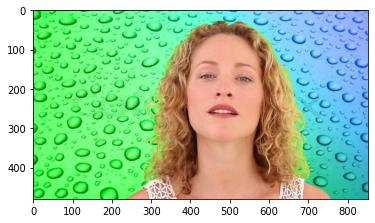

In [137]:
final_image = resized_image + masked_image
plt.imshow(final_image)


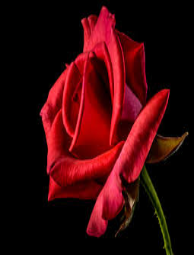

In [152]:
path2 = '/gdrive/My Drive/images/'
I = cv2.imread(path+'rose.jpeg',cv2.IMREAD_UNCHANGED)  

I = cv2.resize(I, (194,255))
cv2_imshow(I)

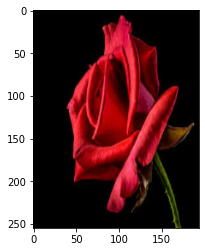

In [153]:
import matplotlib.pyplot as plt
image_copy = np.copy(I)
image_copy = cv2.cvtColor(image_copy, cv2.COLOR_BGR2RGB)
plt.imshow(image_copy)

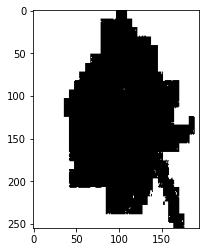

In [178]:
black = np.array([0, 0, 0])    
mask = cv2.inRange(image_copy, black, black)
plt.imshow(mask,'gray')

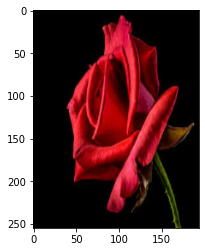

In [165]:
masked_image = np.copy(image_copy)
masked_image[mask != 0] = [0, 0, 0]
plt.imshow(masked_image)

In [166]:
print(masked_image.shape)

(255, 194, 3)


(259, 194, 3)
(255, 194, 3)


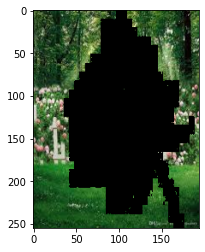

In [167]:
# Load in a background image, and convert it to RGB 
background_image = cv2.imread('background4.jpeg')
background_image = cv2.cvtColor(background_image, cv2.COLOR_BGR2RGB)
print(background_image.shape)
resized_image = cv2.resize(background_image, (194,255)) 
print(resized_image.shape)
resized_image[mask == 0] = [0, 0, 0]
plt.imshow(resized_image)

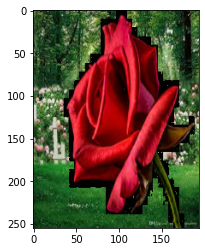

In [168]:
final_image = resized_image + masked_image
plt.imshow(final_image)

In [105]:
path2 = '/gdrive/My Drive/images2/'
image = cv2.imread(path+'boy_smiling.jpg')  
im_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
height, width, channels = im_rgb.shape
print(height,width)
quarter_height, quarter_width = height/4, width/4
T = np.float32([[1,0,quarter_width],[0,1,quarter_height]])
print(T)


394 400
[[  1.    0.  100. ]
 [  0.    1.   98.5]]


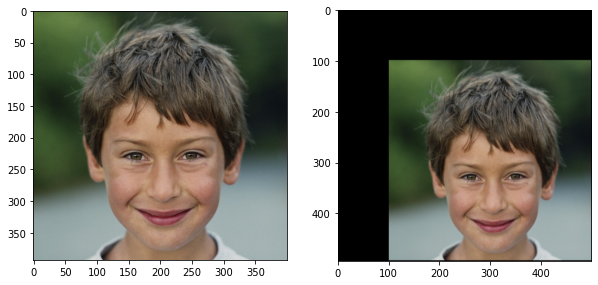

In [99]:
img_translation = cv2.warpAffine(im_rgb, T, (width+100, height+100))
fig, (ax1,ax2) = plt.subplots(1,2,figsize=[10,10])
ax1.imshow(im_rgb)
ax2.imshow(img_translation)
plt.show()

# Rotating an image

In [0]:
M1 = cv2.getRotationMatrix2D(width/2)

HW: Face Alignment: Read the image 'face.jpg' and rotate the image such that eyes are aligned with respect to the x axis. Then show only the face by taking coordinates from the user and scale to the same size.



In [0]:
path2 = '/gdrive/My Drive/images2/'

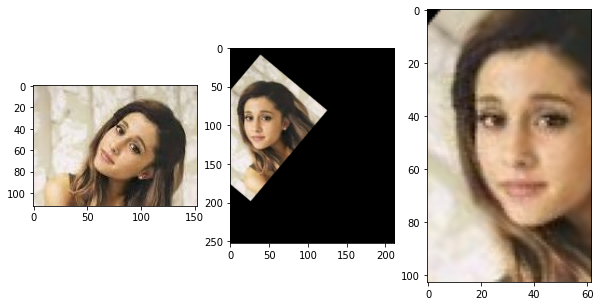

In [243]:
image = cv2.cvtColor(cv2.imread('tilted_face.jpg'),cv2.COLOR_BGR2RGB)  
width,height, channels = image.shape
mat = cv2.getRotationMatrix2D((width/2+50,height/2+50),50,1)
img1 = cv2.warpAffine(image,mat,(width+100,height+100))
Tr = np.float32([[1,0,0],[0,1,-50]])
img_allign = cv2.warpAffine(img1,Tr,(width-50,height-50))
fig, axes = plt.subplots(1,3,figsize = [10,10])
axes[0].imshow(image)
axes[1].imshow(img1)
axes[2].imshow(img_allign)
plt.show()

# Homography

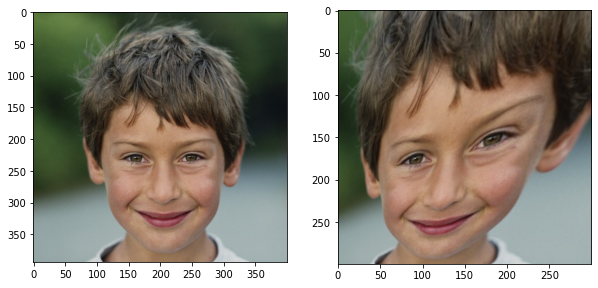

In [248]:
image = cv2.imread(path2+'boy_smiling.jpg') 
pt1 = np.float32([[50,50],[300,150],[25,387],[389,390]])
pt2 = np.float32([[0,0],[300,0],[0,300],[300,300]])
M = cv2.getPerspectiveTransform(pt1,pt2)
im_homography = cv2.warpPerspective(im_rgb,M,(300,300))
fig, (ax1,ax2) = plt.subplots(1,2,figsize=[10,10])
ax1.imshow(im_rgb)
ax2.imshow(im_homography)
plt.show()

HW: Perspective Transformation: Put the banner of coco-cola on the field. Experiment with these functions and show some interesting results.


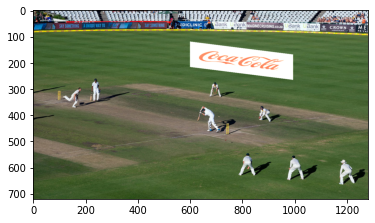

In [244]:
coca = cv2.cvtColor(cv2.imread(path2+'coca.jpg'),cv2.COLOR_BGR2RGB) 
stadium = cv2.cvtColor(cv2.imread(path2+'stadium.jpg'),cv2.COLOR_BGR2RGB) 
pt1 = np.float32([[0,0],[0,185],[325,0],[325,185]])  #coordinates of cola
pt2 = np.float32([[600,120],[600,220],[1000,170],[1000,270]])  #coordinates of stadium
H, status = cv2.findHomography(pt1,pt2)
final_image = cv2.warpPerspective(coca,H,(stadium.shape[1],stadium.shape[0]))
final = cv2.add(stadium,final_image)
plt.imshow(final)